In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
deliveries = pd.read_csv("/content/deliveries.csv")
matches = pd.read_csv("/content/matches.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [4]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [5]:
deliveries.shape

(260920, 17)

In [6]:
matches.shape

(1095, 20)

In [7]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [8]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [9]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

Observations from the deliveries dataframe.

All the columns appear to be in correct Datatype format.


Following is the list of column in int64 / object that you can convert into Categorical columns

Innings

Over

Ball

batsman_runs

Extras_type

is_wicket

dismissal_kind

In [10]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

Observations from info of matches dataset.

Date column - wrong Datatype. It should be Datetime but it is object

Season Column - Wrong Datatype. It should be int / categorical but it is object.


The Following columns in object format can be converted to Categorical:

City

Season

Team1

Team2

Toss_Winner

Toss_Decision

Winner

Result

Venue

In [11]:
deliveries.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [12]:
deliveries['extras_type'].unique()

array(['legbyes', nan, 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

From the above info you can observe that, when there is no extras, then it is represented by nan.
We replace this nan value by None.

In [13]:
deliveries['extras_type'] = deliveries['extras_type'].fillna('None')

In [14]:
deliveries['extras_type'].unique()

array(['legbyes', 'None', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [15]:
deliveries['player_dismissed'].unique()

array([nan, 'SC Ganguly', 'RT Ponting', 'DJ Hussey', 'R Dravid',
       'V Kohli', 'JH Kallis', 'W Jaffer', 'MV Boucher', 'B Akhil',
       'CL White', 'AA Noffke', 'Z Khan', 'SB Joshi', 'PA Patel',
       'ML Hayden', 'MS Dhoni', 'SK Raina', 'JDP Oram', 'K Goel',
       'JR Hopes', 'Yuvraj Singh', 'KC Sangakkara', 'T Kohli',
       'YK Pathan', 'SR Watson', 'DS Lehmann', 'M Kaif', 'M Rawat',
       'RA Jadeja', 'SK Warne', 'V Sehwag', 'L Ronchi', 'DJ Thornely',
       'ST Jayasuriya', 'PR Shah', 'RV Uthappa', 'AM Nayar', 'SM Pollock',
       'S Chanderpaul', 'LRPL Taylor', 'Y Venugopal Rao', 'VVS Laxman',
       'AC Gilchrist', 'RG Sharma', 'SB Styris', 'AS Yadav', 'A Symonds',
       'WPUJC Vaas', 'SB Bangar', 'PP Ojha', 'BB McCullum', 'WP Saha',
       'Mohammad Hafeez', 'DPMD Jayawardene', 'IK Pathan', 'B Lee',
       'S Sohal', 'Kamran Akmal', 'Shahid Afridi', 'G Gambhir',
       'MEK Hussey', 'DJ Bravo', 'MA Khote', 'Harbhajan Singh',
       'GC Smith', 'D Salunkhe', 'RR Sarwan',

From the above response, we can conclude that when there is no wicket, then it is a nan value. So we fill this nan using 'None'.

In [16]:
deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna('None')

In [17]:
# kind
deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

From the above response, we can conclude that when there is no dismissal kind, it is a nan value. So we fill this nan using 'None'.

In [18]:
deliveries['dismissal_kind'] = deliveries['dismissal_kind'].fillna('None')

In [19]:
# fielders_involved
deliveries['fielder'].unique()

array([nan, 'JH Kallis', 'P Kumar', 'CL White', 'M Kartik', 'RT Ponting',
       'WP Saha', 'AB Agarkar', 'BB McCullum', 'KC Sangakkara',
       'IK Pathan', 'PA Patel', 'Joginder Sharma', 'P Amarnath',
       'M Manhas', 'B Geeves', 'V Kohli', 'Z Khan', 'MV Boucher',
       'AM Nayar', 'L Ronchi', 'LR Shukla', 'Mohammad Hafeez', 'AB Dinda',
       'DJ Hussey', 'SC Ganguly', 'RG Sharma', 'SB Styris', 'A Symonds',
       'Kamran Akmal', 'RA Jadeja', 'PP Chawla', 'S Dhawan', 'KD Karthik',
       'MK Tiwary', 'GD McGrath', 'G Gambhir', 'AC Gilchrist', 'DJ Bravo',
       'Harbhajan Singh', 'S Badrinath', 'JDP Oram', 'SK Raina',
       'D Salunkhe', 'SB Bangar', 'D Kalyankrishna', 'VVS Laxman',
       'DS Kulkarni', 'AM Rahane', 'A Nehra', 'B Lee', 'RR Sarwan',
       'Yuvraj Singh', 'MM Patel', 'GC Smith', 'M Rawat', 'Sohail Tanvir',
       'A Kumble', 'M Muralitharan', 'MS Dhoni', 'I Sharma', 'PP Ojha',
       'DPMD Jayawardene', 'V Sehwag', 'W Jaffer', 'R Vinay Kumar',
       'R Dravid',

In [20]:
deliveries['fielder'] = deliveries['fielder'].fillna('None')

In [21]:
matches.isnull().sum()

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


In [22]:
matches['method'].unique()

array([nan, 'D/L'], dtype=object)

This column contains either match is decides by duckworth lewis or not

So, we fill the nan values using 'None'.

In [23]:
matches['method'] = matches['method'].fillna('None')

In [24]:
matches[matches['result_margin'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,None,MR Benson,M Erasmus
130,419121,2009/10,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,None,K Hariharan,DJ Harper
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,None,SS Hazare,RJ Tucker
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,None,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,None,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,None,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,None,M Erasmus,S Ravi
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,None,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,None,HDPK Dharmasena,K Srinivasan
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,None,AK Chaudhary,CB Gaffaney


In [25]:

matches['result_margin'] = matches['result_margin'].fillna('NA')

In [26]:
matches['winner'] = matches['winner'].fillna('NA')

In [27]:
matches['player_of_match'] = matches['player_of_match'].fillna('NA')

In [28]:
matches[matches['city'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,None,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,None,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,167.0,20.0,N,None,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,192.0,20.0,N,None,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,194.0,20.0,N,None,M Erasmus,S Ravi
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,141.0,20.0,N,None,HDPK Dharmasena,RK Illingworth
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,151.0,20.0,N,None,Aleem Dar,VA Kulkarni
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,185.0,20.0,N,None,M Erasmus,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,142.0,20.0,N,None,BF Bowden,M Erasmus
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,126.0,20.0,N,None,Aleem Dar,VA Kulkarni


Observe that The city where we have nan values, the staiums are

Dubai International Cricket Stadium - Dubai

Sharjah Cricket Stadium - Sharjah

We replace nan with these values in the city attribute.

In [29]:
for index, row in matches.iterrows():
  if row['venue'] == 'Dubai International Cricket Stadium':
    matches.at[index, 'city'] = 'Dubai'
  elif row['venue'] == 'Sharjah Cricket Stadium':
    matches.at[index,'city'] = 'Sharjah'

In [30]:
matches[matches['city'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2


In [31]:
matches.isnull().sum()

,0
id,0
season,0
city,0
date,0
match_type,0
player_of_match,0
venue,0
team1,0
team2,0
toss_winner,0


In [32]:
deliveries.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


**Finding if any Anomalies in Data**

Matches

In [33]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [34]:
matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [35]:
matches['season'].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024'], dtype=object)

In [36]:
matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

There is a team repreated Twice.

Rising Pune Supergiants - Rising Pune Supergiant

Replace team names:

Delhi Daredevils - Delhi Capitals

Punjab Kings - Kings XI Punjab

In [37]:
matches['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

There is a team repreated Twice.

Rising Pune Supergiants - Rising Pune Supergiant

Replace team names:

Delhi Daredevils - Delhi Capitals

Punjab Kings - Kings XI Punjab

In [38]:
# Changing the Names.
team_names = {'Rising Pune Supergiant':'Rising Pune Supergiants','Delhi Daredevils':'Delhi Capitals','Kings XI Punjab':'Punjab Kings'}

In [39]:
matches['team1'] = matches['team1'].replace(team_names)


In [40]:
matches['team2'] = matches['team2'].replace(team_names)

The Following values are Duplicate

Wankhede Stadium - Wankhede Stadium, Mumbai

Brabourne Stadium - Brabourne Stadium, Mumbai

Eden Gardens - Eden Gardens, Kolkata

Arun Jaitley Stadium - Arun Jaitley Stadium, Delhi

Punjab Cricket Association IS Bindra Stadium - Punjab Cricket Association IS Bindra Stadium, Mohali

Maharashtra Cricket Association Stadium - Maharashtra Cricket Association Stadium, Pune

Rajiv Gandhi International Stadium - Rajiv Gandhi International Stadium, Uppal

Dr DY Patil Sports Academy - Dr DY Patil Sports Academy, Mumbai

MA Chidambaram Stadium - MA Chidambaram Stadium, Chepauk -MA Chidambaram Stadium, Chepauk, Chennail

Arun Jaitley Stadium - Arun Jaitley Stadium, Delhi

Zayed Cricket Stadium, Abu Dhabi - Sheikh Zayed Stadium

In [41]:
venue_dict = {'Wankhede Stadium, Mumbai':'Wankhede Stadium','Brabourne Stadium, Mumbai':'Brabourne Stadium',
              'Eden Gardens, Kolkata':'Eden Gardens','Arun Jaitley Stadium, Delhi':'Arun Jaitley Stadium',
              'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association IS Bindra Stadium',
              'Maharashtra Cricket Association Stadium, Pune':'Maharashtra Cricket Association Stadium',
              'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium','Dr DY Patil Sports Academy, Mumbai':
              'Dr DY Patil Sports Academy','Arun Jaitley Stadium, Delhi':'Arun Jaitley Stadium','Zayed Cricket Stadium, Abu Dhabi':
              'Sheikh Zayed Stadium','MA Chidambaram Stadium, Chepauk':'MA Chidambaram Stadium','MA Chidambaram Stadium, Chepauk, Chennail':
              'MA Chidambaram Stadium','Narendra Modi Stadium, Ahmedabad':'Narendra Modi Stadium'}

In [42]:
matches['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [43]:
matches['venue'] = matches['venue'].replace(venue_dict)
matches['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

There is a team repreated Twice.

Rising Pune Supergiants - Rising Pune Supergiant
Teams name has been replaced

Delhi Daredevils - Delhi Capitals

Punjab Kings - Kings XI Punjab

In [44]:
matches['toss_winner'] = matches['toss_winner'].replace(team_names)

In [45]:
matches['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [46]:
matches['super_over'].unique()

array(['N', 'Y'], dtype=object)

In [47]:
matches['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'NA',
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

There is a team repreated Twice.

Rising Pune Supergiants - Rising Pune Supergiant
Teams name has been replaced

Delhi Daredevils - Delhi Capitals

Punjab Kings - Kings XI Punjab

In [48]:
matches['winner'] = matches['winner'].replace(team_names)

In [49]:
matches['result'].unique()

array(['runs', 'wickets', 'tie', 'no result'], dtype=object)

In [50]:
matches['result_margin'].unique()

array([140.0, 33.0, 9.0, 5.0, 6.0, 3.0, 66.0, 7.0, 10.0, 4.0, 13.0, 45.0,
       8.0, 29.0, 18.0, 23.0, 12.0, 65.0, 25.0, 1.0, 14.0, 41.0, 105.0,
       19.0, 75.0, 92.0, 11.0, 24.0, 'NA', 27.0, 38.0, 78.0, 16.0, 53.0,
       2.0, 31.0, 55.0, 98.0, 34.0, 36.0, 17.0, 39.0, 40.0, 67.0, 63.0,
       37.0, 57.0, 35.0, 22.0, 21.0, 48.0, 26.0, 20.0, 85.0, 32.0, 76.0,
       111.0, 82.0, 43.0, 58.0, 28.0, 74.0, 42.0, 59.0, 46.0, 47.0, 86.0,
       44.0, 87.0, 130.0, 15.0, 60.0, 77.0, 30.0, 50.0, 93.0, 72.0, 62.0,
       97.0, 138.0, 71.0, 144.0, 80.0, 51.0, 61.0, 146.0, 64.0, 102.0,
       118.0, 49.0, 69.0, 88.0, 54.0, 91.0, 52.0, 81.0, 56.0, 112.0,
       106.0], dtype=object)

In [51]:
matches['method'].unique()

array(['None', 'D/L'], dtype=object)

In [52]:
matches['player_of_match'].unique()

array(['BB McCullum', 'MEK Hussey', 'MF Maharoof', 'MV Boucher',
       'DJ Hussey', 'SR Watson', 'V Sehwag', 'ML Hayden', 'YK Pathan',
       'KC Sangakkara', 'JDP Oram', 'AC Gilchrist', 'SM Katich',
       'MS Dhoni', 'ST Jayasuriya', 'GD McGrath', 'SE Marsh',
       'SA Asnodkar', 'IK Pathan', 'P Kumar', 'SM Pollock',
       'Sohail Tanvir', 'S Sreesanth', 'A Nehra', 'SC Ganguly',
       'L Balaji', 'Shoaib Akhtar', 'A Mishra', 'DPMD Jayawardene',
       'GC Smith', 'DJ Bravo', 'M Ntini', 'SP Goswami', 'A Kumble',
       'KD Karthik', 'JA Morkel', 'R Vinay Kumar', 'Umar Gul', 'SK Raina',
       'CRD Fernando', 'SR Tendulkar', 'R Dravid', 'DL Vettori',
       'RP Singh', 'M Muralitharan', 'CH Gayle', 'AB de Villiers',
       'RS Bopara', 'PP Ojha', 'TM Dilshan', 'HH Gibbs', 'DP Nannes',
       'JP Duminy', 'Yuvraj Singh', 'SB Jakati', 'JH Kallis', 'G Gambhir',
       'RG Sharma', 'A Singh', 'S Badrinath', 'DR Smith', 'LRPL Taylor',
       'Harbhajan Singh', 'R Bhatia', 'SK Warne', 'B

# **Deliveries**

In [53]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [54]:
deliveries['inning'].unique()

array([1, 2, 3, 4, 5, 6])

Usually there are 2 innings in any T20 cricket match. But here it is showing 6. This is because in particular match there were 2 super overs. Hence the value is 6.

In [55]:
deliveries['over'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [56]:
deliveries['ball'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [57]:
deliveries['batter'].unique()

array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis',
       'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar',
       'Z Khan', 'SB Joshi', 'PA Patel', 'ML Hayden', 'MEK Hussey',
       'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'K Goel',
       'JR Hopes', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif',
       'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne',
       'SK Trivedi', 'G Gambhir', 'V Sehwag', 'S Dhawan', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul',
       'LRPL Taylor', 'AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxman',
       'A Symonds', 'RG Sharma', 'SB Styris', 'AS Yadav', 'SB Bangar',
       'WPUJC Vaas', 'RP Singh', 'WP Saha', 'LR Shukla',
       'DPMD Jayawardene', 'S Sohal', 'B Lee', 'PP Cha

In [58]:
deliveries['bowler'].unique()

array(['P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi',
       'CL White', 'AB Dinda', 'I Sharma', 'AB Agarkar', 'SC Ganguly',
       'LR Shukla', 'B Lee', 'S Sreesanth', 'JR Hopes', 'IK Pathan',
       'K Goel', 'PP Chawla', 'WA Mota', 'JDP Oram', 'MS Gony',
       'M Muralitharan', 'P Amarnath', 'Joginder Sharma', 'GD McGrath',
       'B Geeves', 'MF Maharoof', 'R Bhatia', 'DL Vettori', 'MM Patel',
       'SR Watson', 'SK Trivedi', 'SK Warne', 'YK Pathan', 'D Salunkhe',
       'R Vinay Kumar', 'B Akhil', 'A Nehra', 'SM Pollock', 'DS Kulkarni',
       'ST Jayasuriya', 'Harbhajan Singh', 'AM Nayar', 'M Kartik',
       'Mohammad Hafeez', 'DJ Hussey', 'WPUJC Vaas', 'RP Singh',
       'SB Styris', 'SB Bangar', 'A Symonds', 'PP Ojha', 'Pankaj Singh',
       'Mohammad Asif', 'VY Mahesh', 'Shahid Afridi', 'DJ Bravo',
       'VS Yeligati', 'MA Khote', 'D Kalyankrishna', 'VRV Singh',
       'Sohail Tanvir', 'A Kumble', 'DNT Zoysa', 'SD Chitnis',
       'Yuvraj Singh', 'Shoaib Malik',

In [59]:
deliveries['extras_type'].unique()

array(['legbyes', 'None', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [60]:
deliveries[deliveries['extras_type'] == 'penalty']

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
1614,335988,2,Delhi Daredevils,Deccan Chargers,11,6,V Sehwag,PP Ojha,S Dhawan,0,5,5,penalty,0,None,None,None
98231,729309,2,Delhi Daredevils,Mumbai Indians,4,2,M Vijay,SL Malinga,Q de Kock,0,7,7,penalty,0,None,None,None


In [61]:
deliveries['batsman_runs'].unique()

array([0, 4, 6, 1, 2, 5, 3])

In [62]:
deliveries['extra_runs'].unique()

array([1, 0, 5, 4, 2, 3, 7])

In [63]:
deliveries['total_runs'].unique()

array([1, 0, 4, 6, 5, 2, 3, 7])

In [64]:
deliveries['is_wicket'].unique()

array([0, 1])

In [65]:
deliveries['player_dismissed'].unique()

array(['None', 'SC Ganguly', 'RT Ponting', 'DJ Hussey', 'R Dravid',
       'V Kohli', 'JH Kallis', 'W Jaffer', 'MV Boucher', 'B Akhil',
       'CL White', 'AA Noffke', 'Z Khan', 'SB Joshi', 'PA Patel',
       'ML Hayden', 'MS Dhoni', 'SK Raina', 'JDP Oram', 'K Goel',
       'JR Hopes', 'Yuvraj Singh', 'KC Sangakkara', 'T Kohli',
       'YK Pathan', 'SR Watson', 'DS Lehmann', 'M Kaif', 'M Rawat',
       'RA Jadeja', 'SK Warne', 'V Sehwag', 'L Ronchi', 'DJ Thornely',
       'ST Jayasuriya', 'PR Shah', 'RV Uthappa', 'AM Nayar', 'SM Pollock',
       'S Chanderpaul', 'LRPL Taylor', 'Y Venugopal Rao', 'VVS Laxman',
       'AC Gilchrist', 'RG Sharma', 'SB Styris', 'AS Yadav', 'A Symonds',
       'WPUJC Vaas', 'SB Bangar', 'PP Ojha', 'BB McCullum', 'WP Saha',
       'Mohammad Hafeez', 'DPMD Jayawardene', 'IK Pathan', 'B Lee',
       'S Sohal', 'Kamran Akmal', 'Shahid Afridi', 'G Gambhir',
       'MEK Hussey', 'DJ Bravo', 'MA Khote', 'Harbhajan Singh',
       'GC Smith', 'D Salunkhe', 'RR Sarwa

In [66]:
deliveries['dismissal_kind'].unique()

array(['None', 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [67]:
deliveries['fielder'].unique()

array(['None', 'JH Kallis', 'P Kumar', 'CL White', 'M Kartik',
       'RT Ponting', 'WP Saha', 'AB Agarkar', 'BB McCullum',
       'KC Sangakkara', 'IK Pathan', 'PA Patel', 'Joginder Sharma',
       'P Amarnath', 'M Manhas', 'B Geeves', 'V Kohli', 'Z Khan',
       'MV Boucher', 'AM Nayar', 'L Ronchi', 'LR Shukla',
       'Mohammad Hafeez', 'AB Dinda', 'DJ Hussey', 'SC Ganguly',
       'RG Sharma', 'SB Styris', 'A Symonds', 'Kamran Akmal', 'RA Jadeja',
       'PP Chawla', 'S Dhawan', 'KD Karthik', 'MK Tiwary', 'GD McGrath',
       'G Gambhir', 'AC Gilchrist', 'DJ Bravo', 'Harbhajan Singh',
       'S Badrinath', 'JDP Oram', 'SK Raina', 'D Salunkhe', 'SB Bangar',
       'D Kalyankrishna', 'VVS Laxman', 'DS Kulkarni', 'AM Rahane',
       'A Nehra', 'B Lee', 'RR Sarwan', 'Yuvraj Singh', 'MM Patel',
       'GC Smith', 'M Rawat', 'Sohail Tanvir', 'A Kumble',
       'M Muralitharan', 'MS Dhoni', 'I Sharma', 'PP Ojha',
       'DPMD Jayawardene', 'V Sehwag', 'W Jaffer', 'R Vinay Kumar',
       '

# **Analysis**

**Matches**

In [68]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,None,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,None,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,None,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,None,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,None,BF Bowden,K Hariharan


In [69]:
# Top 5 Teams Who have played Maximum no of matches
(matches['team1'].value_counts() + matches['team2'].value_counts()).sort_values(ascending = False).head(5)

,count
Mumbai Indians,261
Delhi Capitals,252
Kolkata Knight Riders,251
Punjab Kings,246
Royal Challengers Bangalore,240


In [70]:
# Top 5 teams in terms of winning tosses ( All season combined)
matches['toss_winner'].value_counts().head()

,count
toss_winner,
Mumbai Indians,143
Delhi Capitals,130
Chennai Super Kings,122
Kolkata Knight Riders,122
Rajasthan Royals,120


In [71]:
# Toss winning to match winning (all season combined)
matches[matches['toss_winner']==matches['winner']].shape[0]

554

In [72]:
# its ratio
matches[matches['toss_winner']==matches['winner']].shape[0]/matches.shape[0]

0.5059360730593607

In [73]:
# Toss winning to match winning ( Season wise)
season = matches.groupby(['season'])

In [74]:
matches[matches['toss_winner']==matches['winner']].groupby('season')['id'].count()

,id
season,
2007/08,28
2009,33
2009/10,31
2011,38
2012,33
2013,36
2014,30
2015,28
2016,34


In [75]:
# Its ratio
matches[matches['toss_winner']==matches['winner']].groupby('season')['id'].count() / matches.groupby('season')['id'].count()

,id
season,
2007/08,0.482759
2009,0.578947
2009/10,0.516667
2011,0.520548
2012,0.445946
2013,0.473684
2014,0.500000
2015,0.474576
2016,0.566667


In [76]:
# Toss winning to match winning ( Team wise)
matches[matches['toss_winner']==matches['winner']].groupby('toss_winner')['id'].count()

,id
toss_winner,
Chennai Super Kings,75
Deccan Chargers,19
Delhi Capitals,61
Gujarat Lions,10
Gujarat Titans,14
Kochi Tuskers Kerala,4
Kolkata Knight Riders,68
Lucknow Super Giants,10
Mumbai Indians,78


In [77]:
(matches[matches['toss_winner']==matches['winner']].groupby('toss_winner')['id'].count() / matches.groupby('toss_winner')['id'].count()).sort_values(ascending = False)

,id
toss_winner,
Gujarat Lions,0.666667
Gujarat Titans,0.636364
Rising Pune Supergiants,0.615385
Chennai Super Kings,0.614754
Kolkata Knight Riders,0.557377
Mumbai Indians,0.545455
Lucknow Super Giants,0.526316
Royal Challengers Bangalore,0.504425
Kochi Tuskers Kerala,0.500000


In [78]:
# Toss winning to match winning ( City wise)
matches[matches['toss_winner']==matches['winner']].groupby('city')['id'].count().sort_values(ascending = False)

,id
city,
Mumbai,91
Kolkata,49
Delhi,45
Chennai,42
Bangalore,35
Jaipur,30
Chandigarh,29
Pune,28
Hyderabad,28


In [79]:
(matches[matches['toss_winner']==matches['winner']].groupby('city')['id'].count() / matches.groupby('city')['id'].count()).sort_values(ascending = False)

,id
city,
Bloemfontein,1.000000
Kanpur,1.000000
Indore,0.777778
Cuttack,0.714286
Kimberley,0.666667
Centurion,0.666667
East London,0.666667
Durban,0.600000
Sharjah,0.571429


In [80]:
# Top 5 winning team by count ( all seasons combined)
matches.groupby('winner')['id'].count().sort_values(ascending = False)

,id
winner,
Mumbai Indians,144
Chennai Super Kings,138
Kolkata Knight Riders,131
Royal Challengers Bangalore,116
Delhi Capitals,115
Punjab Kings,112
Rajasthan Royals,112
Sunrisers Hyderabad,88
Deccan Chargers,29


In [81]:
matches.groupby(['season','winner'])['winner'].count()

season   winner                     
2007/08  Chennai Super Kings            9
         Deccan Chargers                2
         Delhi Capitals                 7
         Kolkata Knight Riders          6
         Mumbai Indians                 7
                                       ..
2024     Mumbai Indians                 4
         Punjab Kings                   5
         Rajasthan Royals               9
         Royal Challengers Bengaluru    7
         Sunrisers Hyderabad            9
Name: winner, Length: 150, dtype: int64

In [82]:
matches.columns
# Average margin of winning by runs
matches[matches['result'] == 'runs']['result_margin'].mean()

30.104417670682732

In [83]:
# Average margin of winning by runs (season wise)
matches[matches['result'] == 'runs'].groupby('season')['result_margin'].mean()

,result_margin
season,
2007/08,29.375
2009,28.296296
2009/10,31.483871
2011,33.272727
2012,28.235294
2013,33.540541
2014,29.272727
2015,26.5625
2016,32.190476


In [84]:
# Average margin of winning by runs (team wise)
matches[matches['result'] == 'runs'].groupby('winner')['result_margin'].mean().sort_values(ascending = False)

,result_margin
winner,
Royal Challengers Bengaluru,42.25
Chennai Super Kings,34.943662
Gujarat Titans,34.181818
Royal Challengers Bangalore,33.924528
Kolkata Knight Riders,33.592593
Mumbai Indians,32.971831
Rajasthan Royals,30.837209
Delhi Capitals,25.630435
Rising Pune Supergiants,25.142857


In [85]:
# Average margin of winning by wickets
matches[matches['result'] == 'wickets']['result_margin'].mean()

6.192041522491349

In [86]:
#Average margin of winning by wickets (season wise)
matches[matches['result'] == 'wickets'].groupby('season')['result_margin'].mean()

,result_margin
season,
2007/08,6.5
2009,6.206897
2009/10,6.785714
2011,6.794872
2012,6.025
2013,6.135135
2014,6.081081
2015,6.166667
2016,6.25641


In [87]:
# Average margin of winning by wikcets (team wise)
matches[matches['result'] == 'wickets'].groupby('winner')['result_margin'].mean().sort_values(ascending = False)

,result_margin
winner,
Kochi Tuskers Kerala,7.5
Sunrisers Hyderabad,6.72093
Royal Challengers Bangalore,6.57377
Deccan Chargers,6.545455
Rising Pune Supergiants,6.375
Delhi Capitals,6.227273
Punjab Kings,6.206897
Kolkata Knight Riders,6.197368
Mumbai Indians,6.197183


In [88]:
# most player of the match (all season combined)
matches.groupby('player_of_match')['id'].count().sort_values(ascending = False).head(5)

,id
player_of_match,
AB de Villiers,25
CH Gayle,22
RG Sharma,19
DA Warner,18
V Kohli,18


In [89]:
qualifiers = matches[matches['match_type']!= 'League']

In [90]:
(qualifiers['team1'].value_counts() + qualifiers['team2'].value_counts()).sort_values(ascending = False)

,count
Chennai Super Kings,26.0
Mumbai Indians,20.0
Kolkata Knight Riders,15.0
Royal Challengers Bangalore,15.0
Sunrisers Hyderabad,14.0
Delhi Capitals,11.0
Rajasthan Royals,11.0
Gujarat Titans,5.0
Punjab Kings,4.0
Deccan Chargers,NaN


In [91]:
# Highest no of matches played at venue
matches.groupby('venue')['id'].count().sort_values(ascending = False).head(5)

,id
venue,
Wankhede Stadium,118
Eden Gardens,93
M Chinnaswamy Stadium,65
Rajiv Gandhi International Stadium,64
Feroz Shah Kotla,60


# **Merging Two DataFrames**

In [92]:
matches = matches.merge(deliveries,left_on = 'id',right_on = 'match_id',how = 'inner')

In [93]:
matches

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,BB McCullum,0,1,1,legbyes,0,None,None,None
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,None,0,None,None,None
2,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,1,1,wides,0,None,None,None
3,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,None,0,None,None,None
4,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,None,0,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,AK Markram,VR Iyer,1,0,1,None,0,None,None,None
260916,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,AK Markram,SS Iyer,1,0,1,None,0,None,None,None
260917,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Shahbaz Ahmed,SS Iyer,1,0,1,None,0,None,None,None
260918,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Shahbaz Ahmed,VR Iyer,1,0,1,None,0,None,None,None


In [94]:
matches.shape

(260920, 37)

In [95]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                260920 non-null  int64  
 1   season            260920 non-null  object 
 2   city              260920 non-null  object 
 3   date              260920 non-null  object 
 4   match_type        260920 non-null  object 
 5   player_of_match   260920 non-null  object 
 6   venue             260920 non-null  object 
 7   team1             260920 non-null  object 
 8   team2             260920 non-null  object 
 9   toss_winner       260920 non-null  object 
 10  toss_decision     260920 non-null  object 
 11  winner            260920 non-null  object 
 12  result            260920 non-null  object 
 13  result_margin     260920 non-null  object 
 14  target_runs       260611 non-null  float64
 15  target_overs      260611 non-null  float64
 16  super_over        26

<Axes: xlabel='over'>

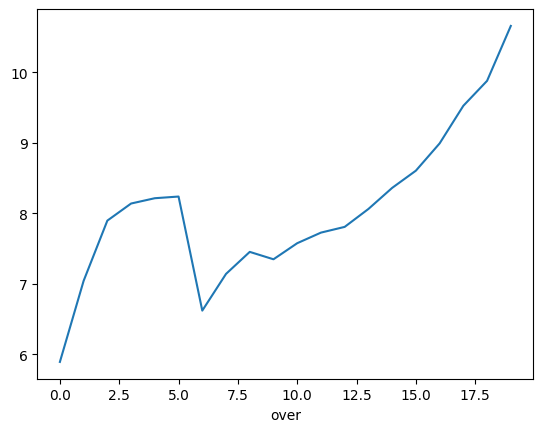

In [96]:
# Average runs in an over (All seasons combined)
(matches.groupby('over')['total_runs'].mean()*6).plot(kind = 'line')

In [97]:
# Average runs in an over (inning wise)
pd.crosstab(index = matches['over'],columns = matches['inning'],values = matches['total_runs']*6,aggfunc = 'mean')

inning,1,2,3,4,5,6
over,,,,,,
0,5.601569,6.067317,10.675325,10.25,8.25,22.5
1,6.840609,7.242222,NaN,NaN,NaN,NaN
2,7.749706,8.043549,NaN,NaN,NaN,NaN
3,7.852124,8.427643,NaN,NaN,NaN,NaN
4,8.266000,8.162945,NaN,NaN,NaN,NaN
5,8.187454,8.289626,NaN,NaN,NaN,NaN
6,6.494462,6.744499,NaN,NaN,NaN,NaN
7,7.112265,7.167340,NaN,NaN,NaN,NaN
8,7.344121,7.562162,NaN,NaN,NaN,NaN


In [98]:

pd.crosstab(index = matches['batting_team'],columns = matches['over'],values = matches['total_runs']*6,aggfunc = 'mean')

over,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
batting_team,,,,,,,,,,,,,,,,,,,,
Chennai Super Kings,5.058586,6.466488,7.507148,8.232082,8.595483,8.963165,6.684783,6.912688,7.635986,7.140083,7.676838,7.949384,7.565398,8.167689,8.496561,8.572031,8.968509,10.110236,10.532209,11.752790
Deccan Chargers,6.206009,7.627329,7.303226,7.243129,7.577586,7.666667,6.169935,7.015184,6.696774,6.505400,7.391685,8.126087,6.915929,7.671910,8.066667,8.027027,9.529412,9.276498,8.819277,9.065217
Delhi Capitals,6.687179,7.985989,9.010676,8.391382,9.413613,8.288770,7.041591,7.281139,7.534636,7.247740,8.032787,7.254545,7.996364,7.182482,8.349206,8.148936,9.038251,9.464627,9.036437,10.849515
Delhi Daredevils,5.847507,7.421520,7.516484,7.891566,8.053892,7.264113,6.976602,6.778345,7.426230,7.276074,7.550562,7.645464,8.049536,7.481013,6.992481,8.130099,8.913140,9.437877,9.439689,10.969325
Gujarat Lions,6.463918,7.099476,9.639344,8.585106,8.706522,9.535135,8.093750,8.254144,7.602094,7.777778,7.846154,6.692308,7.419355,8.480447,7.848837,8.206897,8.845714,8.468571,9.942857,8.975610
Gujarat Titans,6.149466,8.218310,8.565217,7.650000,7.747368,8.314286,6.881720,7.079137,8.814545,7.650000,8.000000,8.721429,7.304348,8.177936,9.154412,9.257143,9.642105,10.036765,10.945312,12.192661
Kings XI Punjab,5.925926,6.691152,7.754622,8.346712,8.255102,8.282333,6.871050,7.425894,7.519313,7.363167,7.743278,7.616391,7.849424,8.347594,8.396797,8.892086,8.734317,8.774373,9.318271,10.237714
Kochi Tuskers Kerala,6.791209,6.471910,7.931034,8.590909,6.689655,9.428571,6.000000,6.070588,6.211765,5.923077,6.000000,7.898734,7.807229,6.070588,8.506329,4.746269,7.687500,8.095238,9.245902,9.120000
Kolkata Knight Riders,6.362515,7.206068,7.721406,8.167095,8.128287,8.034816,6.601171,7.173403,7.058594,7.552529,7.592568,7.840319,8.167665,8.177097,8.353909,8.673184,9.403433,9.589325,9.825666,9.684312


<Axes: xlabel='over'>

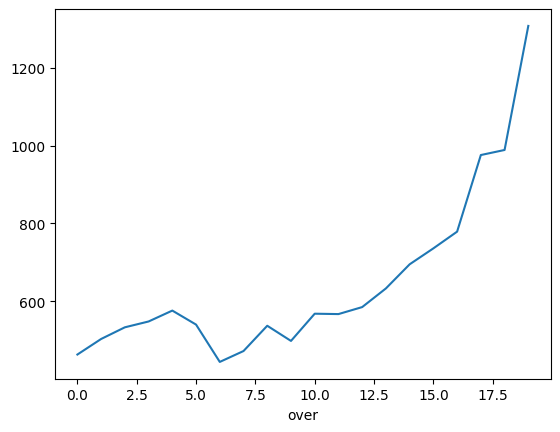

In [99]:
# Distribution of wickets by overs
matches.groupby('over')['is_wicket'].sum().plot(kind = 'line')

In [100]:
# Distribution of wickets (innings wise)
pd.crosstab(index = matches['over'],columns = matches['inning'],values = matches['is_wicket'],aggfunc = 'sum')

inning,1,2,3,4,5,6
over,,,,,,
0,192.0,244.0,19.0,7.0,1.0,0.0
1,232.0,271.0,NaN,NaN,NaN,NaN
2,264.0,269.0,NaN,NaN,NaN,NaN
3,276.0,272.0,NaN,NaN,NaN,NaN
4,278.0,298.0,NaN,NaN,NaN,NaN
5,276.0,264.0,NaN,NaN,NaN,NaN
6,222.0,222.0,NaN,NaN,NaN,NaN
7,215.0,257.0,NaN,NaN,NaN,NaN
8,289.0,248.0,NaN,NaN,NaN,NaN


<Axes: xlabel='ball'>

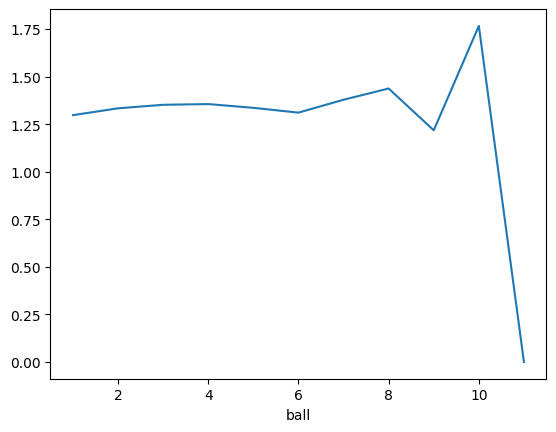

In [101]:
#MEAN of runs by ball
matches.groupby('ball')['total_runs'].mean().plot(kind = 'line')

In [102]:

# average runs in a ball (inning wise)
pd.crosstab(index = matches['ball'],columns = matches['inning'],values = matches['total_runs'],aggfunc = 'mean')

inning,1,2,3,4,5,6
ball,,,,,,
1,1.297333,1.297454,0.928571,2.071429,1.0,6.0
2,1.343607,1.322615,1.285714,1.500000,1.0,1.0
3,1.360590,1.342112,2.000000,1.571429,1.0,4.0
4,1.367686,1.341164,2.750000,2.166667,4.0,4.0
5,1.346867,1.323761,2.000000,1.625000,1.0,NaN
6,1.319852,1.300537,2.222222,1.250000,1.0,NaN
7,1.430224,1.322816,1.000000,1.000000,0.0,NaN
8,1.470160,1.401294,NaN,1.000000,2.0,NaN
9,1.183333,1.257143,NaN,NaN,NaN,NaN


In [103]:
#Creating a Dataframe contains records of Sixes
sixes = matches[matches['batsman_runs']==6]


In [104]:
import seaborn as sns


<Axes: ylabel='over'>

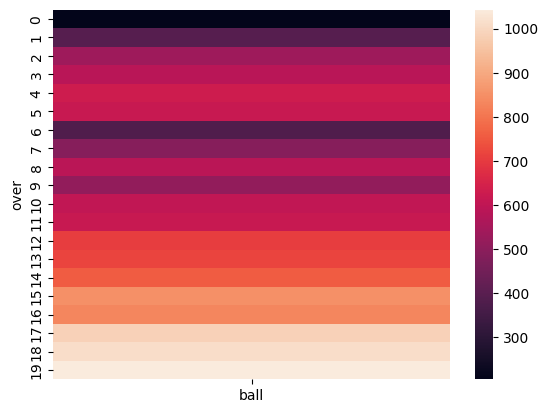

In [105]:
# Distribution of sixes according to overs
sns.heatmap(pd.DataFrame(sixes.groupby('over')['ball'].count()))

<Axes: ylabel='ball'>

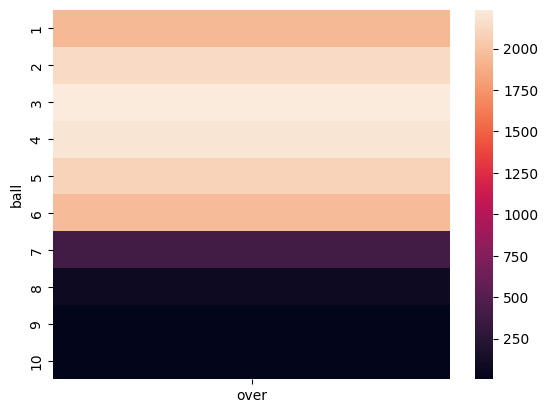

In [106]:
#Distribution of sixes grouped by ball
sns.heatmap(pd.DataFrame(sixes.groupby('ball')['over'].count()))

In [107]:
# Creating a DataFrame containing only records of fours
fours = matches[matches['batsman_runs']==4]

In [108]:
fours.groupby('over')['ball'].count()

,ball
over,
0,1703
1,2003
2,2198
3,2229
4,2215
5,2184
6,1029
7,1126
8,1175


In [109]:
fours.groupby('ball')['over'].count()

,over
ball,
1,4642
2,4898
3,4864
4,4952
5,4777
6,4591
7,948
8,154
9,21


In [110]:
# Creating a DataFrame containg records of wickets
wickets  =  matches[matches['is_wicket']==1]

In [111]:
wickets.groupby('over')['ball'].count()

,ball
over,
0,463
1,503
2,533
3,548
4,576
5,540
6,444
7,472
8,537


In [112]:
wickets.groupby('ball')['over'].count()

,over
ball,
1,1957
2,2146
3,2066
4,2151
5,2039
6,2094
7,422
8,64
9,11


In [113]:
# Creating A DataFrame of Extras only
extras = matches[matches['extras_type'] != 'None']

In [114]:
extras['extras_type'].value_counts()

,count
extras_type,
wides,8380
legbyes,4001
noballs,1069
byes,673
penalty,2


<Axes: ylabel='count'>

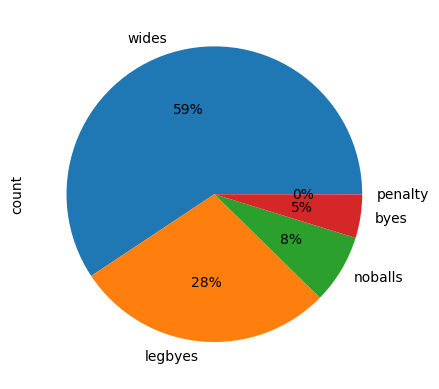

In [115]:
extras['extras_type'].value_counts().plot(kind = 'pie',autopct = '%1.f%%')

<Axes: xlabel='over'>

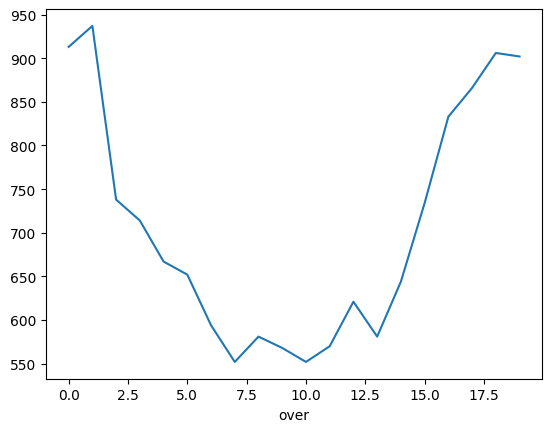

In [116]:
#count of extras grouped by over
extras.groupby('over')['ball'].count().plot(kind = 'line')

<Axes: xlabel='ball'>

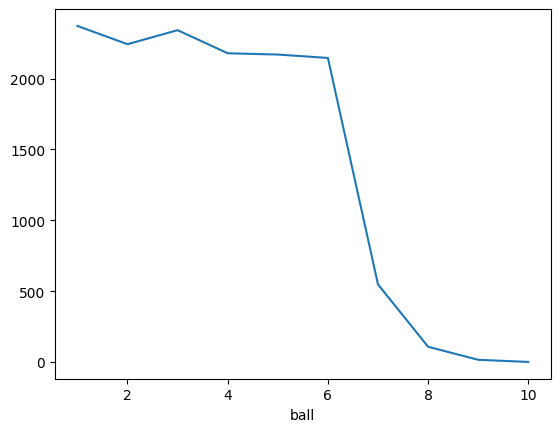

In [117]:
extras.groupby('ball')['over'].count().plot(kind = 'line')

In [118]:
pd.crosstab(index = extras['over'],columns = extras['inning'],values = extras['extra_runs'],aggfunc = 'count')

inning,1,2,3,4,5
over,,,,,
0,450.0,444.0,7.0,10.0,2.0
1,468.0,469.0,NaN,NaN,NaN
2,358.0,380.0,NaN,NaN,NaN
3,357.0,357.0,NaN,NaN,NaN
4,341.0,326.0,NaN,NaN,NaN
5,336.0,316.0,NaN,NaN,NaN
6,297.0,297.0,NaN,NaN,NaN
7,267.0,285.0,NaN,NaN,NaN
8,273.0,308.0,NaN,NaN,NaN


# **Eighteenth Over**

In [119]:
eighteenth_over = matches[matches['over']==17]
eighteenth_over.head(2)


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
106,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,AA Noffke,BB McCullum,0,0,0,None,1,DJ Hussey,caught,CL White
107,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,AA Noffke,Mohammad Hafeez,1,0,1,None,0,None,None,None


In [120]:

# Average runs in 18th over (All seasons)
eighteenth_over['total_runs'].mean()*6

9.527033609352166

In [121]:

# Average Runs in 18th over (Season wise)
eighteenth_over.groupby('season')['total_runs'].mean()*6

,total_runs
season,
2007/08,9.687500
2009,9.220657
2009/10,9.155096
2011,8.716535
2012,9.328571
2013,9.157175
2014,9.765396
2015,9.567823
2016,10.249624


In [122]:

# average runs in each ball of the 18th over ( All Seasons)
eighteenth_over.groupby('ball')['total_runs'].mean()

,total_runs
ball,
1,1.579053
2,1.577079
3,1.609470
4,1.602354
5,1.590580
6,1.567708
7,1.644105
8,1.490741
9,1.000000


In [123]:

# No of sixes hit in 18 th over (All Seasons)
eighteenth_over[eighteenth_over['batsman_runs']==6].shape[0]

985

<Axes: xlabel='season'>

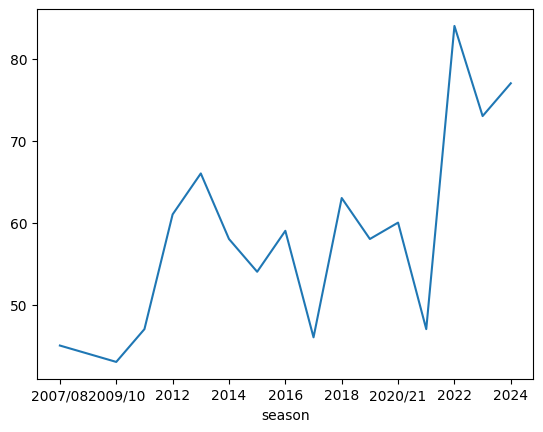

In [124]:
# No of sixes hit in 18th over (season wise)
eighteenth_over[eighteenth_over['batsman_runs']==6].groupby('season')['total_runs'].count().plot(kind = 'line')

In [125]:

# No of fours hit in 18 th over (All Seasons)
eighteenth_over[eighteenth_over['batsman_runs']==4].shape[0]

1424

<Axes: xlabel='season'>

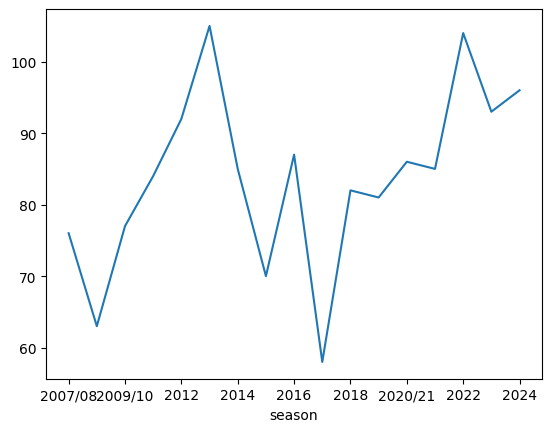

In [126]:
# No of fours hit in 18 th over (Season wise)
eighteenth_over[eighteenth_over['batsman_runs']==4].groupby('season')['total_runs'].count().plot(kind = 'line')

In [127]:

# count of wickets in 18th over (all seasons)
eighteenth_over[eighteenth_over['is_wicket']==1].shape[0]

976

<Axes: xlabel='season'>

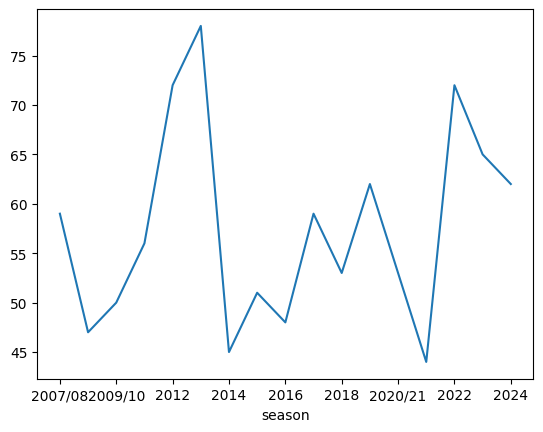

In [128]:
# count of wickets in 18th over (seasons wise)
eighteenth_over[eighteenth_over['is_wicket']==1].groupby('season')['id'].count().plot(kind = 'line')

<Axes: xlabel='bowler'>

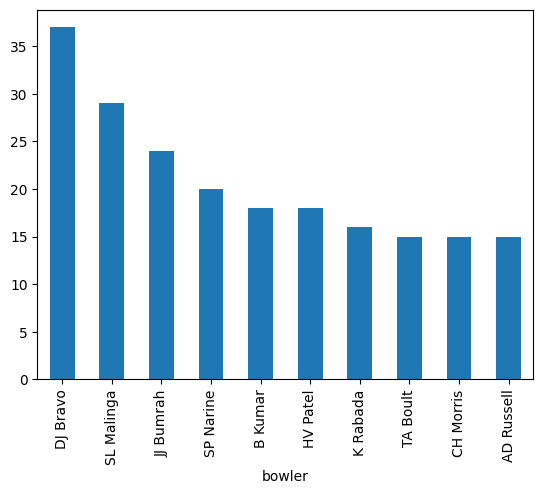

In [129]:
# bowler who have taken most wickets in 18th over
eighteenth_over[eighteenth_over['is_wicket']==1].groupby('bowler')['bowler'].count().sort_values(ascending = False).head(10).plot(kind = 'bar')

<Axes: xlabel='batter'>

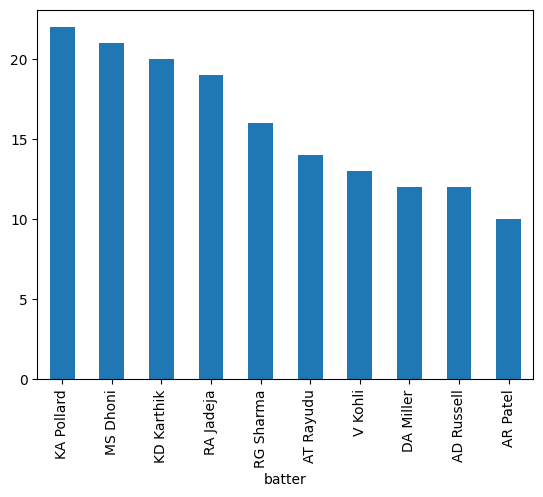

In [130]:
# batsmans who have lost their wicket in 18th over
eighteenth_over[eighteenth_over['is_wicket']==1].groupby('batter')['batter'].count().sort_values(ascending = False).head(10).plot(kind = 'bar')

<Axes: xlabel='batter'>

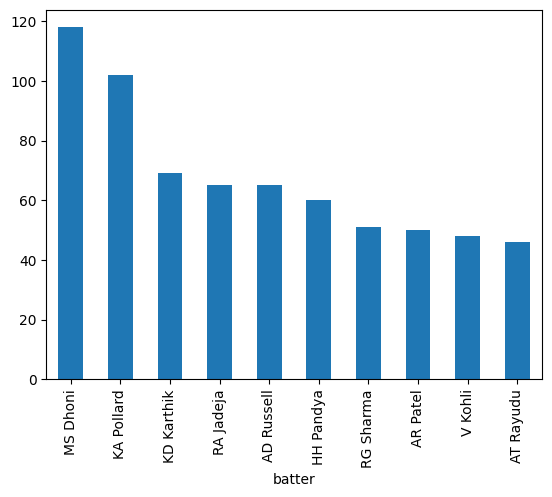

In [131]:
# batsman who have played maximum dot alls in 18th over
eighteenth_over[eighteenth_over['batsman_runs']==0].groupby('batter')['batter'].count().sort_values(ascending = False).head(10).plot(kind = 'bar')

<Axes: xlabel='bowler'>

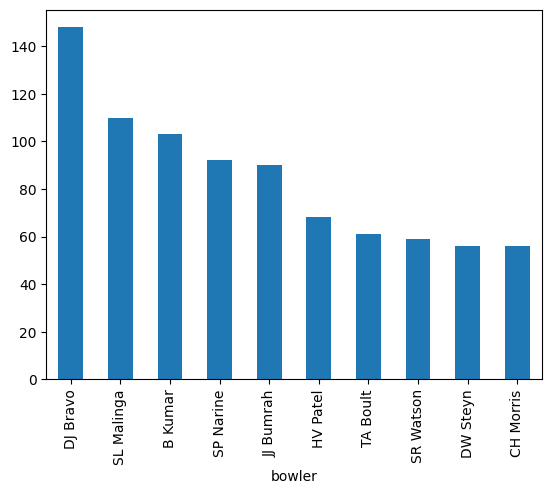

In [132]:
# bowlers who have thrown dot balls in 18th over.
eighteenth_over[eighteenth_over['batsman_runs']==0].groupby('bowler')['bowler'].count().sort_values(ascending = False).head(10).plot(kind = 'bar')

<Axes: xlabel='batter'>

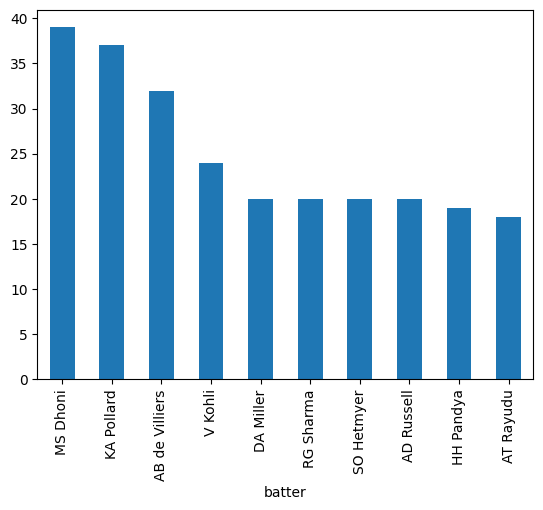

In [133]:

# batsmans who have hit 6 in 18th over.
eighteenth_over[eighteenth_over['batsman_runs']==6].groupby('batter')['batter'].count().sort_values(ascending = False).head(10).plot(kind = 'bar')

In [134]:
# bowlers who got hit with 6 in 18th over
eighteenth_over[eighteenth_over['batsman_runs']==6].groupby('bowler')['bowler'].count().sort_values(ascending = False).head(10)

,bowler
bowler,
DJ Bravo,26
TA Boult,24
YS Chahal,19
B Kumar,18
K Rabada,17
MM Sharma,17
SP Narine,16
T Natarajan,16
Mohammed Siraj,16


In [135]:

# Maximum number of fours by a batsman
eighteenth_over[eighteenth_over['batsman_runs']==4].groupby('batter')['batter'].count().sort_values(ascending = False).head(10)

,batter
batter,
MS Dhoni,49
KD Karthik,42
AB de Villiers,31
KA Pollard,24
AT Rayudu,24
RG Sharma,21
V Kohli,20
RA Jadeja,20
YK Pathan,20


In [136]:
# maximum fours that has been given by a bowler
eighteenth_over[eighteenth_over['batsman_runs']==4].groupby('bowler')['bowler'].count().sort_values(ascending = False).head(10)

,bowler
bowler,
B Kumar,43
DJ Bravo,42
MM Sharma,34
TA Boult,30
JD Unadkat,28
HV Patel,23
P Kumar,21
K Rabada,21
AB Dinda,20


In [137]:
# maximum ball played by a batsman in 18th over
eighteenth_over.groupby('batter')['batter'].count().sort_values(ascending = False).head(10)

,batter
batter,
MS Dhoni,401
KA Pollard,280
RA Jadeja,241
KD Karthik,234
HH Pandya,193
AB de Villiers,176
RG Sharma,171
AT Rayudu,170
V Kohli,169


In [138]:
# runs scored by batsman in 18th over.
eighteenth_over.groupby('batter')['batsman_runs'].sum().sort_values(ascending = False).head(10)

,batsman_runs
batter,
MS Dhoni,664
KA Pollard,452
AB de Villiers,406
KD Karthik,387
RA Jadeja,329
V Kohli,325
AT Rayudu,302
RG Sharma,298
HH Pandya,297


In [139]:
# runs scored in 18th over by teams
eighteenth_over.groupby('batting_team')['total_runs'].sum().sort_values(ascending = False)

,total_runs
batting_team,
Mumbai Indians,2466
Chennai Super Kings,2354
Royal Challengers Bangalore,2231
Kolkata Knight Riders,2156
Rajasthan Royals,1899
Sunrisers Hyderabad,1589
Kings XI Punjab,1575
Delhi Daredevils,1304
Delhi Capitals,825


In [140]:
(eighteenth_over.groupby('batting_team')['total_runs'].sum()*6 / eighteenth_over.groupby('batting_team')['total_runs'].count()).sort_values(ascending = False)

,total_runs
batting_team,
Rising Pune Supergiants,11.382353
Royal Challengers Bangalore,10.312789
Royal Challengers Bengaluru,10.227273
Punjab Kings,10.138554
Chennai Super Kings,10.110236
Gujarat Titans,10.036765
Lucknow Super Giants,9.835294
Mumbai Indians,9.811671
Kolkata Knight Riders,9.589325


In [141]:
# how much team has scored in each season in 18th over
eighteenth_over.groupby(['batting_team','season'])['total_runs'].sum().unstack()

season,2007/08,2009,2009/10,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020/21,2021,2022,2023,2024
batting_team,,,,,,,,,,,,,,,,,
Chennai Super Kings,130.0,140.0,138.0,153.0,145.0,166.0,156.0,170.0,NaN,NaN,213.0,166.0,135.0,169.0,142.0,165.0,166.0
Deccan Chargers,156.0,129.0,107.0,107.0,172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delhi Capitals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,151.0,171.0,145.0,118.0,135.0
Delhi Daredevils,91.0,108.0,119.0,146.0,106.0,94.0,154.0,105.0,132.0,130.0,119.0,NaN,NaN,NaN,NaN,NaN,NaN
Gujarat Lions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gujarat Titans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.0,176.0,118.0
Kings XI Punjab,123.0,125.0,115.0,94.0,138.0,147.0,196.0,87.0,110.0,102.0,122.0,109.0,107.0,NaN,NaN,NaN,NaN
Kochi Tuskers Kerala,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kolkata Knight Riders,128.0,101.0,132.0,110.0,142.0,162.0,151.0,100.0,123.0,76.0,165.0,184.0,164.0,114.0,108.0,105.0,91.0


# **Nineteenth Over**

In [142]:
nineteenth_over = matches[matches['over']==18]
nineteenth_over.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
112,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,JH Kallis,Mohammad Hafeez,6,0,6,None,0,None,None,None
113,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,JH Kallis,Mohammad Hafeez,0,0,0,None,0,None,None,None


In [143]:

# Average runs in 19th over (All seasons)
nineteenth_over['total_runs'].mean()*6

9.881377881377881

In [144]:
# Average Runs in 19th over (Season wise)
nineteenth_over.groupby('season')['total_runs'].mean()*6

,total_runs
season,
2007/08,9.960000
2009,8.584158
2009/10,9.687307
2011,9.355649
2012,9.750000
2013,9.409262
2014,9.905213
2015,10.115702
2016,9.678756


In [145]:
# average run in each ball of the 19th over ( All Seasons)
nineteenth_over.groupby('ball')['total_runs'].mean()

,total_runs
ball,
1,1.588360
2,1.621853
3,1.677699
4,1.665382
5,1.677672
6,1.631699
7,1.709877
8,1.587156
9,2.360000


In [146]:
# No of sixes hit in 19th over (All Seasons)
nineteenth_over[nineteenth_over['batsman_runs']==6].shape[0]

1013

In [147]:
# No of sixes hit in 19th over (season wise)
nineteenth_over[nineteenth_over['batsman_runs']==6].groupby('season')['total_runs'].count()

,total_runs
season,
2007/08,44
2009,36
2009/10,47
2011,54
2012,65
2013,52
2014,57
2015,59
2016,39


In [148]:
# No of fours hit in 19th over (All Seasons)
nineteenth_over[nineteenth_over['batsman_runs']==4].shape[0]

1384

In [149]:
# No of fours hit in 18th over (Season wise)
nineteenth_over[nineteenth_over['batsman_runs']==4].groupby('season')['total_runs'].count()

,total_runs
season,
2007/08,72
2009,59
2009/10,82
2011,78
2012,91
2013,107
2014,72
2015,73
2016,77


In [150]:
# count of wickets in 19th over (all seasons)
nineteenth_over[nineteenth_over['is_wicket']==1].shape[0]

989

<Axes: xlabel='season'>

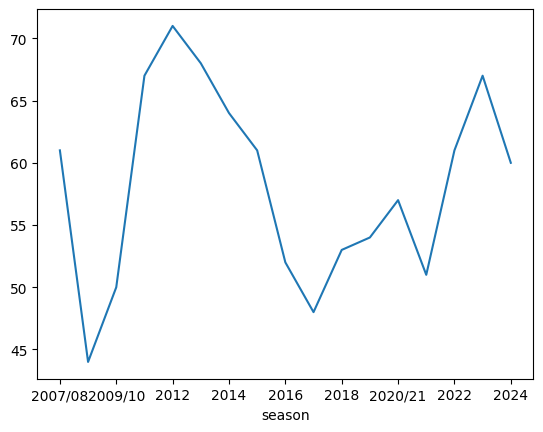

In [151]:
# count of wickets in 19th over (seasons wise)
nineteenth_over[nineteenth_over['is_wicket']==1].groupby('season')['id'].count().plot(kind = 'line')

<Axes: xlabel='bowler'>

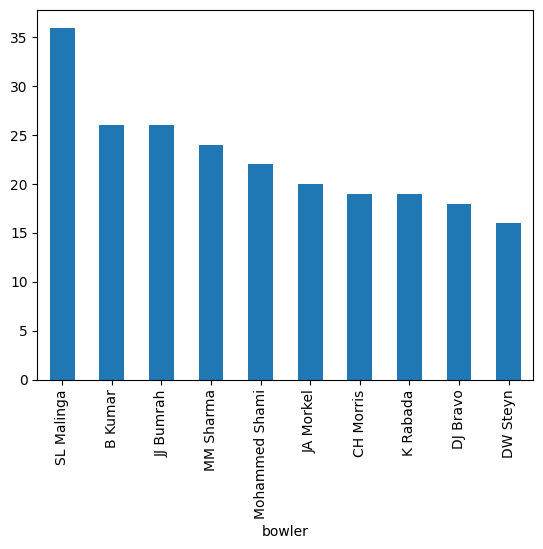

In [152]:

# bowler who have taken most number of wickets in 19th over
nineteenth_over[nineteenth_over['is_wicket']==1].groupby('bowler')['bowler'].count().sort_values(ascending = False).head(10).plot(kind = 'bar')

<Axes: xlabel='batter'>

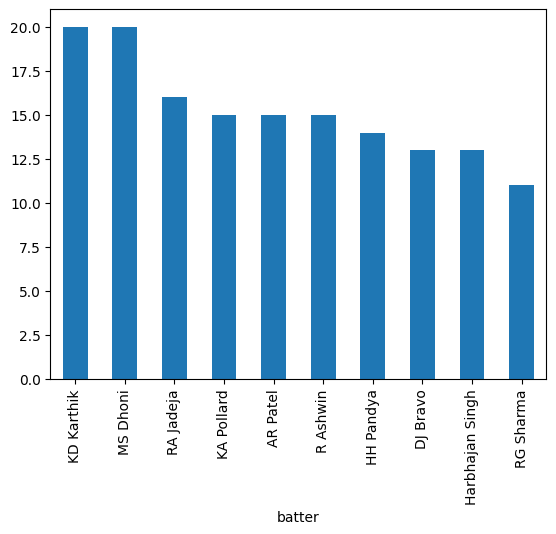

In [153]:
# batsmans who have lost their wicket in 19th over
nineteenth_over[nineteenth_over['is_wicket']==1].groupby('batter')['batter'].count().sort_values(ascending = False).head(10).plot(kind = 'bar')

<Axes: xlabel='batter'>

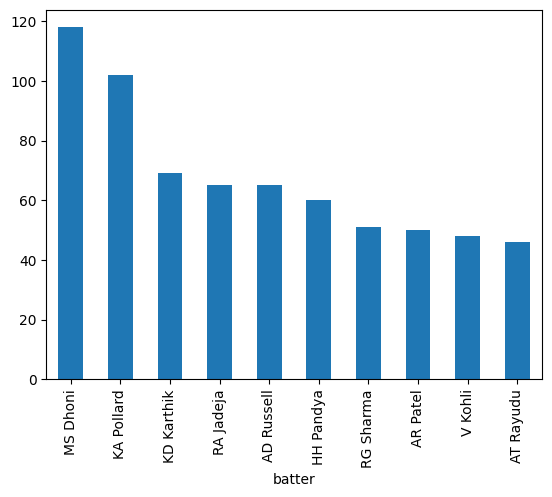

In [154]:
# batsman who have played maximum dot alls in 19th over
eighteenth_over[eighteenth_over['batsman_runs']==0].groupby('batter')['batter'].count().sort_values(ascending = False).head(10).plot(kind = 'bar')

In [155]:
# bowlers who have thrown dot balls in 19th over.
nineteenth_over[nineteenth_over['batsman_runs']==0].groupby('bowler')['bowler'].count().sort_values(ascending = False).head(10)

,bowler
bowler,
B Kumar,120
JJ Bumrah,115
SL Malinga,112
Mohammed Siraj,88
MM Sharma,84
DW Steyn,71
SP Narine,70
K Rabada,69
SN Thakur,67


In [156]:

# batsmans who have hit 6 in 19th over.
nineteenth_over[nineteenth_over['batsman_runs']==6].groupby('batter')['batter'].count().sort_values(ascending = False).head(10)

,batter
batter,
MS Dhoni,41
AB de Villiers,36
AD Russell,33
KD Karthik,29
HH Pandya,27
KA Pollard,24
RA Jadeja,18
AT Rayudu,16
R Tewatia,15


In [157]:
# bowlers who got hit with 6 in 18th over
nineteenth_over[nineteenth_over['batsman_runs']==6].groupby('bowler')['bowler'].count().sort_values(ascending = False).head(10)

,bowler
bowler,
B Kumar,22
SN Thakur,20
Mohammed Shami,20
DJ Bravo,20
Mohammed Siraj,19
MM Sharma,18
K Rabada,17
Avesh Khan,17
JC Archer,16


In [158]:
# Maximum number of fours hit by a batsman
nineteenth_over[nineteenth_over['batsman_runs']==4].groupby('batter')['batter'].count().sort_values(ascending = False).head(10)

,batter
batter,
MS Dhoni,58
RA Jadeja,36
KD Karthik,32
AB de Villiers,30
KA Pollard,27
DJ Bravo,23
YK Pathan,23
RG Sharma,22
Harbhajan Singh,22


In [159]:

# maximum fours that has been given by a bowler
nineteenth_over[nineteenth_over['batsman_runs']==4].groupby('bowler')['bowler'].count().sort_values(ascending = False).head(10)

,bowler
bowler,
B Kumar,37
JJ Bumrah,36
TA Boult,26
T Natarajan,25
Mohammed Shami,24
DW Steyn,23
R Vinay Kumar,23
MM Sharma,23
UT Yadav,23


In [160]:
# maximum ball played by a batsman in 19th over
nineteenth_over.groupby('batter')['batter'].count().sort_values(ascending = False).head(10)

,batter
batter,
MS Dhoni,387
RA Jadeja,237
KD Karthik,225
KA Pollard,222
HH Pandya,175
AB de Villiers,158
DA Miller,139
AD Russell,138
YK Pathan,132


In [161]:
# runs scored by batsman in 19th over.
nineteenth_over.groupby('batter')['batsman_runs'].sum().sort_values(ascending = False).head(10)

,batsman_runs
batter,
MS Dhoni,696
AB de Villiers,404
KD Karthik,399
RA Jadeja,396
KA Pollard,380
HH Pandya,320
AD Russell,295
RG Sharma,250
AT Rayudu,250


In [162]:
# runs scored in 19th over by teams
nineteenth_over.groupby('batting_team')['total_runs'].sum().sort_values(ascending = False)

,total_runs
batting_team,
Mumbai Indians,2413
Chennai Super Kings,2289
Royal Challengers Bangalore,2109
Kolkata Knight Riders,2029
Rajasthan Royals,1787
Sunrisers Hyderabad,1710
Kings XI Punjab,1581
Delhi Daredevils,1213
Delhi Capitals,744


In [163]:

(nineteenth_over.groupby('batting_team')['total_runs'].sum()*6 / nineteenth_over.groupby('batting_team')['total_runs'].count()).sort_values(ascending = False)

,total_runs
batting_team,
Rising Pune Supergiant,12.258065
Lucknow Super Giants,11.404412
Gujarat Titans,10.945312
Royal Challengers Bengaluru,10.827586
Chennai Super Kings,10.532209
Sunrisers Hyderabad,10.342742
Royal Challengers Bangalore,10.262774
Mumbai Indians,10.068150
Gujarat Lions,9.942857


In [164]:
nineteenth_over.groupby(['batting_team','season'])['total_runs'].sum().unstack()

season,2007/08,2009,2009/10,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020/21,2021,2022,2023,2024
batting_team,,,,,,,,,,,,,,,,,
Chennai Super Kings,150.0,87.0,157.0,163.0,222.0,170.0,119.0,137.0,NaN,NaN,188.0,153.0,146.0,199.0,129.0,143.0,126.0
Deccan Chargers,123.0,96.0,120.0,119.0,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delhi Capitals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0,172.0,118.0,92.0,87.0,134.0
Delhi Daredevils,95.0,134.0,125.0,121.0,103.0,142.0,102.0,113.0,71.0,99.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN
Gujarat Lions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gujarat Titans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,177.0,122.0
Kings XI Punjab,128.0,89.0,140.0,112.0,120.0,110.0,166.0,114.0,104.0,95.0,130.0,131.0,142.0,NaN,NaN,NaN,NaN
Kochi Tuskers Kerala,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kolkata Knight Riders,117.0,125.0,107.0,96.0,129.0,125.0,75.0,92.0,101.0,91.0,135.0,177.0,132.0,118.0,114.0,156.0,139.0


# **Twenteeth Over**

In [165]:
twenteeth_over = matches[matches['over']==19]
twenteeth_over.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
118,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,Mohammad Hafeez,6,0,6,None,0,None,None,None
119,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,Mohammad Hafeez,6,0,6,None,0,None,None,None


In [166]:

# Average runs in 20th over (All seasons)
twenteeth_over['total_runs'].mean()*6

10.66113222644529

In [167]:

# Average Runs in 20th over (Season wise)
twenteeth_over.groupby('season')['total_runs'].mean()*6

,total_runs
season,
2007/08,10.580645
2009,9.371429
2009/10,10.324324
2011,9.864909
2012,9.988685
2013,10.819242
2014,10.838346
2015,9.967391
2016,10.361396


In [168]:
# average runs in each ball of the 20th over ( All Seasons)
twenteeth_over.groupby('ball')['total_runs'].mean()

,total_runs
ball,
1,1.746761
2,1.694025
3,1.826195
4,1.753503
5,1.770806
6,1.830695
7,1.957393
8,2.025974
9,0.937500


In [169]:
# No of sixes hit in 20th over (All Seasons)
twenteeth_over[twenteeth_over['batsman_runs']==6].shape[0]

1043

In [170]:
# No of sixes hit in 20th over (season wise)
twenteeth_over[twenteeth_over['batsman_runs']==6].groupby('season')['total_runs'].count()

,total_runs
season,
2007/08,45
2009,28
2009/10,41
2011,46
2012,58
2013,72
2014,56
2015,45
2016,46


In [171]:
# No of fours hit in 20th over (All Seasons)
twenteeth_over[twenteeth_over['batsman_runs']==4].shape[0]

1273

In [172]:
# No of fours hit in 20th over (Season wise)
twenteeth_over[twenteeth_over['batsman_runs']==4].groupby('season')['total_runs'].count()

,total_runs
season,
2007/08,64
2009,64
2009/10,88
2011,70
2012,85
2013,91
2014,66
2015,70
2016,53


In [173]:
# count of wickets in 20th over (all seasons)
twenteeth_over[twenteeth_over['is_wicket']==1].shape[0]

1308

<Axes: xlabel='season'>

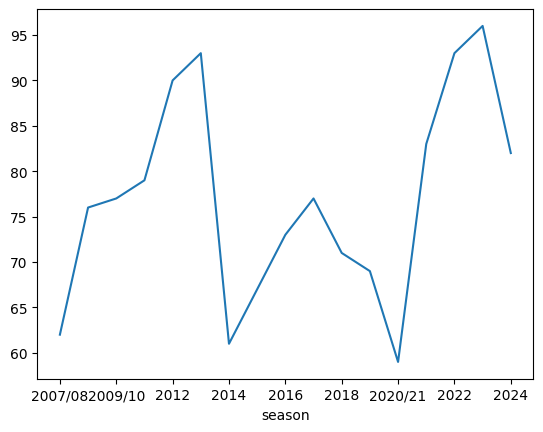

In [174]:
# count of wickets in 20th over (seasons wise)
twenteeth_over[twenteeth_over['is_wicket']==1].groupby('season')['id'].count().plot(kind = 'line')

<Axes: xlabel='bowler'>

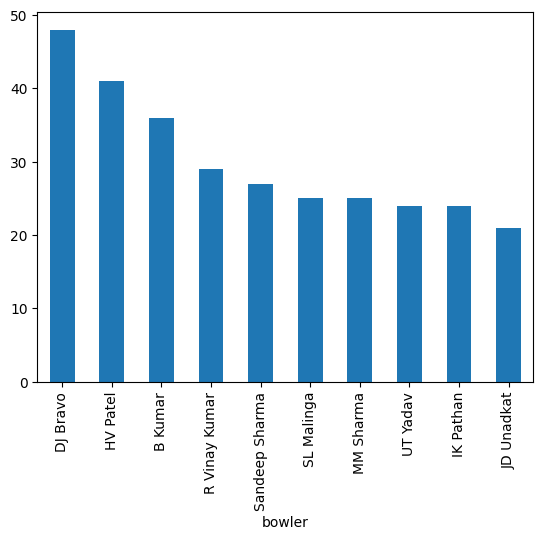

In [175]:
# bowler who have taken most wickets in 20th over
twenteeth_over[twenteeth_over['is_wicket']==1].groupby('bowler')['bowler'].count().sort_values(ascending = False).head(10).plot(kind = 'bar')

<Axes: xlabel='batter'>

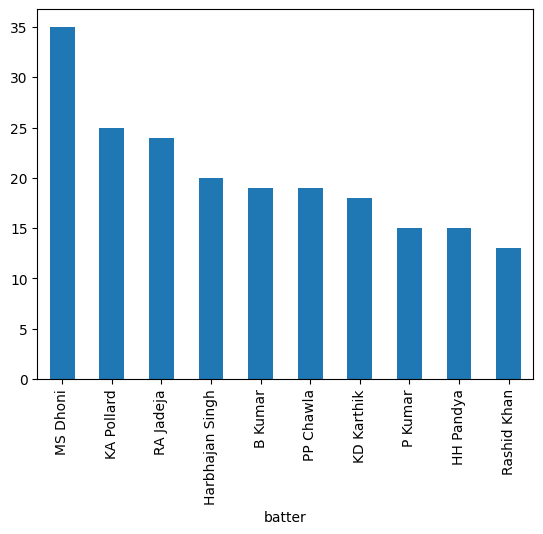

In [176]:
# batsmans who have lost their wicket in 20th over
twenteeth_over[twenteeth_over['is_wicket']==1].groupby('batter')['batter'].count().sort_values(ascending = False).head(10).plot(kind = 'bar')

<Axes: xlabel='batter'>

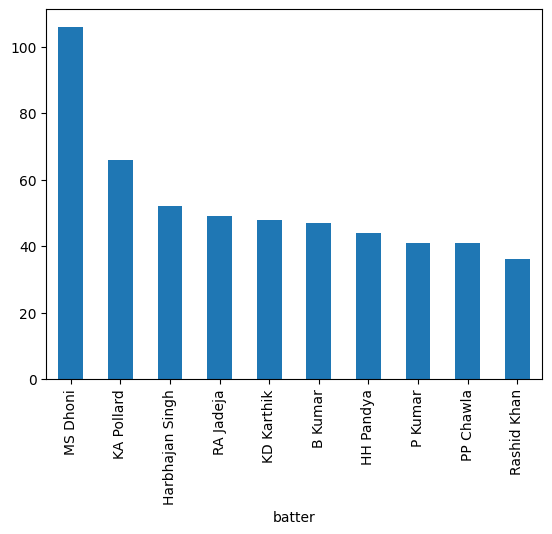

In [177]:
# batsman who have played maximum dot balls in 20th over
twenteeth_over[twenteeth_over['batsman_runs']==0].groupby('batter')['batter'].count().sort_values(ascending = False).head(10).plot(kind = 'bar')

In [178]:
# bowlers who have thrown dot balls in 20th over.
twenteeth_over[twenteeth_over['batsman_runs']==0].groupby('bowler')['bowler'].count().sort_values(ascending = False).head(10)

,bowler
bowler,
DJ Bravo,127
HV Patel,95
B Kumar,84
SL Malinga,64
R Vinay Kumar,63
MM Sharma,61
IK Pathan,59
SN Thakur,56
TA Boult,56


In [179]:
# batsmans who have hit 6 in 20th over.
twenteeth_over[twenteeth_over['batsman_runs']==6].groupby('batter')['batter'].count().sort_values(ascending = False).head(10)

,batter
batter,
MS Dhoni,69
KA Pollard,33
RA Jadeja,30
HH Pandya,28
RG Sharma,23
KD Karthik,20
DA Miller,19
AB de Villiers,19
AD Russell,18


In [180]:
# bowlers who got hit with 6 in 18th over
twenteeth_over[twenteeth_over['batsman_runs']==6].groupby('bowler')['bowler'].count().sort_values(ascending = False).head(10)

,bowler
bowler,
DJ Bravo,30
HV Patel,26
UT Yadav,25
JD Unadkat,23
MM Sharma,21
R Vinay Kumar,20
Sandeep Sharma,19
AB Dinda,19
B Kumar,18


In [181]:
# Maximum four hit by a batsman
twenteeth_over[twenteeth_over['batsman_runs']==4].groupby('batter')['batter'].count().sort_values(ascending = False).head(10)

,batter
batter,
MS Dhoni,57
KA Pollard,26
KD Karthik,26
PP Chawla,24
RG Sharma,20
RA Jadeja,20
HH Pandya,18
V Kohli,18
MP Stoinis,18


In [182]:
# maximum fours that has been given by a bowler
twenteeth_over[twenteeth_over['batsman_runs']==4].groupby('bowler')['bowler'].count().sort_values(ascending = False).head(10)

,bowler
bowler,
DJ Bravo,47
B Kumar,40
R Vinay Kumar,27
AD Russell,27
L Balaji,26
TA Boult,26
UT Yadav,24
SR Watson,22
AB Dinda,22


In [183]:
# maximum ball played by a batsman in 18th over
twenteeth_over.groupby('batter')['batter'].count().sort_values(ascending = False).head(10)

,batter
batter,
MS Dhoni,351
KA Pollard,197
RA Jadeja,193
KD Karthik,144
HH Pandya,128
Harbhajan Singh,118
DJ Bravo,114
DA Miller,107
B Kumar,106


In [184]:
# runs scored by batsman in 18th over.
twenteeth_over.groupby('batter')['batsman_runs'].sum().sort_values(ascending = False).head(10)

,batsman_runs
batter,
MS Dhoni,814
KA Pollard,405
RA Jadeja,380
KD Karthik,292
HH Pandya,287
RG Sharma,257
AB de Villiers,225
DA Miller,222
DJ Bravo,213


In [185]:
# runs scored in 18th over by teams
twenteeth_over.groupby('batting_team')['total_runs'].sum().sort_values(ascending = False)

,total_runs
batting_team,
Mumbai Indians,2355
Chennai Super Kings,2282
Royal Challengers Bangalore,1981
Kolkata Knight Riders,1677
Rajasthan Royals,1661
Kings XI Punjab,1493
Sunrisers Hyderabad,1458
Delhi Daredevils,1192
Delhi Capitals,745


In [186]:
(twenteeth_over.groupby('batting_team')['total_runs'].sum()*6 / twenteeth_over.groupby('batting_team')['total_runs'].count()).sort_values(ascending = False)

,total_runs
batting_team,
Rising Pune Supergiants,13.052632
Gujarat Titans,12.192661
Royal Challengers Bengaluru,12.155844
Rising Pune Supergiant,11.775000
Chennai Super Kings,11.752790
Mumbai Indians,11.459854
Royal Challengers Bangalore,11.087687
Delhi Daredevils,10.969325
Punjab Kings,10.897059


In [187]:
twenteeth_over.groupby(['batting_team','season'])['total_runs'].sum().unstack()

season,2007/08,2009,2009/10,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020/21,2021,2022,2023,2024
batting_team,,,,,,,,,,,,,,,,,
Chennai Super Kings,146.0,107.0,151.0,148.0,171.0,184.0,163.0,121.0,NaN,NaN,144.0,166.0,140.0,183.0,156.0,143.0,159.0
Deccan Chargers,98.0,130.0,91.0,121.0,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delhi Capitals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0,162.0,101.0,113.0,112.0,133.0
Delhi Daredevils,55.0,86.0,100.0,115.0,81.0,116.0,126.0,121.0,106.0,101.0,185.0,NaN,NaN,NaN,NaN,NaN,NaN
Gujarat Lions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gujarat Titans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.0,168.0,97.0
Kings XI Punjab,128.0,84.0,133.0,91.0,158.0,95.0,109.0,118.0,113.0,106.0,83.0,144.0,131.0,NaN,NaN,NaN,NaN
Kochi Tuskers Kerala,NaN,NaN,NaN,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kolkata Knight Riders,115.0,105.0,99.0,76.0,123.0,86.0,96.0,88.0,69.0,68.0,85.0,133.0,125.0,103.0,81.0,150.0,75.0
